In [10]:
import numpy as np
import pandas as pd
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from pathlib import Path
from PIL import Image

numpy: 1.19.2
matplotlib: 3.3.2


In [2]:
date = '20220329'
dataNo = 3
scanNo = 4

In [11]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [18]:
param_name = 'T0046: TOF in the vertical lattice (usec.)'
scan_param =scan_data[param_name]
unique_param = scan_param.unique()
sample1 = unique_param[1]
sample2 = unique_param[10]
sample3 = unique_param[19]
unit = '[us]'

In [14]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

Text(0.5, 1.0, '12000.0[us]')

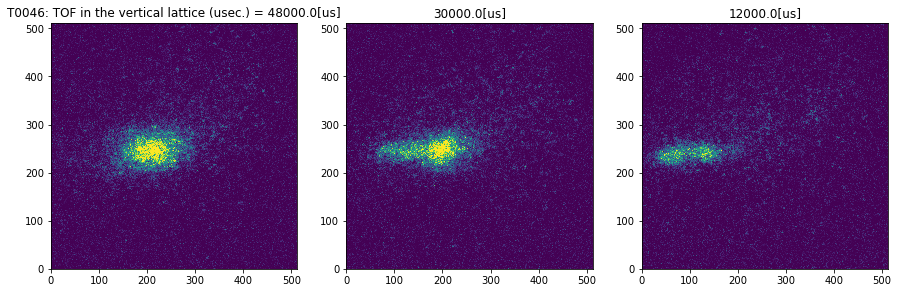

In [19]:
vmin = 0
vmax = 1500
xlim_1 = 120
xlim_2 = 320
ylim_1 = 140
ylim_2 = 340

fig =plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
# ax1.set_xlim(120,320)
# ax1.set_ylim(140,340)
ax1.set_title(param_name+ " = %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(2,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto')
ax2.set_aspect('equal')
# ax2.set_xlim(120,320)
# ax2.set_ylim(140,340)
ax2.set_title("%.01f"%(sample2)+unit)

ax3 = fig.add_subplot(2,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto')
ax3.set_aspect('equal')
# ax3.set_xlim(120,320)
# ax3.set_ylim(140,340)
ax3.set_title("%.01f"%(sample3)+unit)

In [54]:
unique_img_trans_list = []
for i in range(len(unique_param)):
    img_trans_temp = []
    for j in range(len(trans_files)):
        if scan_param[j] == unique_param[i]:
            img_trans_temp.append(img_trans_list[j])
    unique_img_trans_list.append(np.mean(img_trans_temp, axis = 0))

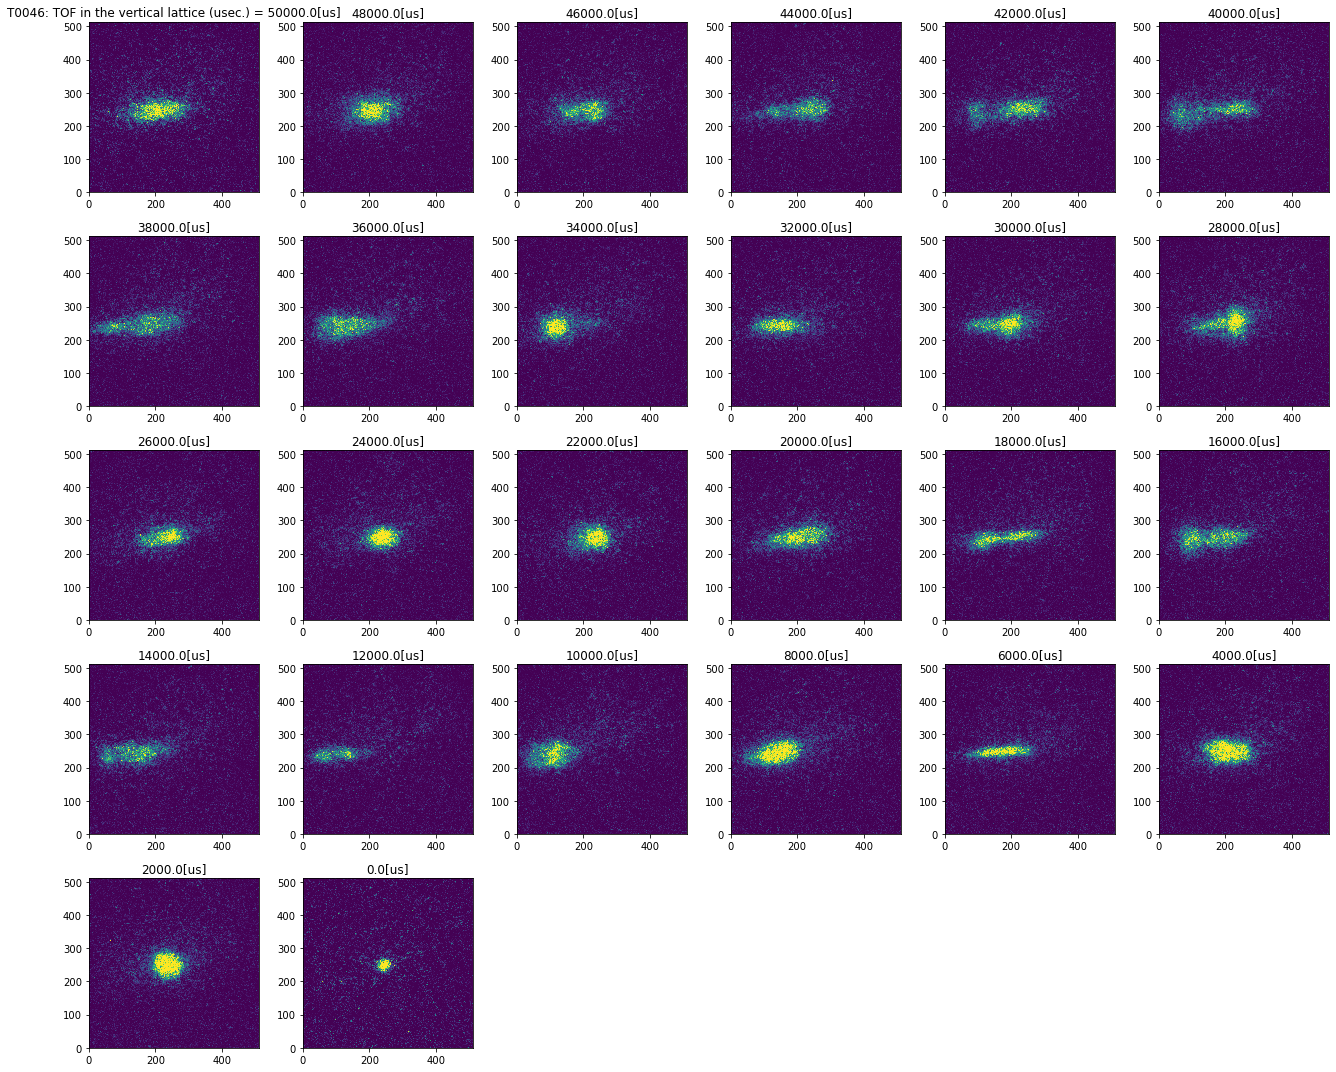

In [57]:
number_of_columns = 6
number_of_arrays = divmod(unique_param.shape[0],number_of_columns)[0]+1
vmin = 0
vmax = 1500
fig =plt.figure(figsize=[3*number_of_columns,3*number_of_arrays])
for i in range(len(unique_param)):
    ax = fig.add_subplot(number_of_arrays,number_of_columns,i+1)
    ax.pcolormesh(unique_img_trans_list[i], vmin=vmin, vmax=vmax, shading='auto')
    ax.set_aspect('equal')
    if i == 0:
        ax.set_title(param_name+ " = %.01f"%(unique_param[i])+unit)
    else:
        ax.set_title("%.01f"%(unique_param[i])+unit)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


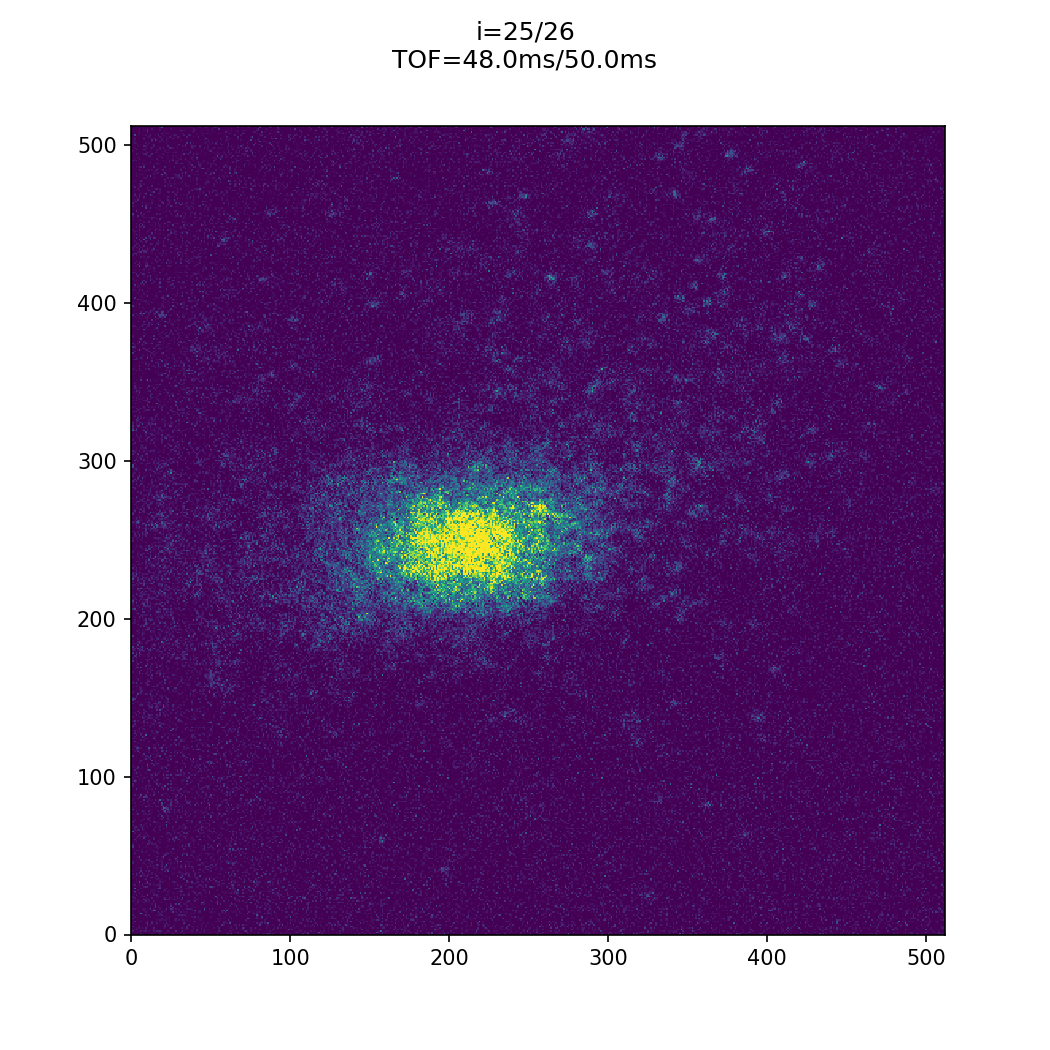

In [74]:
%matplotlib nbagg

fps = 5 # frame per sec
frn = unique_param.shape[0] # frame number of the animation

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.pcolormesh(zarray[-frame_number], vmin=vmin, vmax=vmax, shading='auto')
    fig.suptitle("i="+str(frame_number)+"/"+str(frn)+"\n"+"TOF="+str(unique_param[-frame_number]*10**(-3))+"ms"+"/"+str(np.max(unique_param)*10**(-3))+"ms")

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111)
fig.suptitle("i="+"0"+"/"+str(frn)+"\n"+"TOF="+str(unique_param[-1]*10**(-3))+"ms"+"/"+str(np.max(unique_param)*10**(-3))+"ms")

plot = [ax.pcolormesh(unique_img_trans_list[-1], vmin=vmin, vmax=vmax, shading='auto')]
# ax.set_zlim(-3,3)
# ax.view_init(elev=88, azim=270)
# ax.set_xlabel(r'$X[\lambda_L]$', fontsize=18)
# ax.set_ylabel(r'$Y[\lambda_L]$', fontsize=18, rotation=60)
# ax.set_zlabel(r'$E$', fontsize=30,rotation=60)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(unique_img_trans_list, plot), interval=1000/fps)

In [75]:
from matplotlib.animation import PillowWriter
fn = 'TOF_in_V-lattice'
ani.save(fn+'.gif',writer='pillow',fps=fps)